In [1]:
import importlib

imported_module = importlib.import_module("distributions.plots")
importlib.reload(imported_module)

from distributions.plots import Plots 

In [2]:
# Scenario names
sce = ['abroad-together','domestic-together','abroad-alone','domestic-alone']

#  List of files with:
# name: name to be displayed in the plots
# file:  csv file name
# summer: name of the summer day reported by the model
# winter: name of the winter day reported by the model
# color: color to be used for the model in scatter plots
files =  [
          {'name': 'Calliope', 'file': 'resultsCross_Calliope','summer':'Jul 20','winter':'Feb 08','color':'#D57CBE'},
          {'name': 'Expanse', 'file': 'resultsCross_Expanse','summer':'Jul 02','winter':'Jan 01','color':'#FF7D0D'},
          {'name': 'FlexEco', 'file': 'resultsCross_flexeco','summer':'min resudial\nload','winter':'max resudial\nload','color':'#FF0D7D'},
          {'name': 'Nexus-e+\nEP2050+', 'file': 'resultsCross_Nexuse-EP','summer':'Jul 02','winter':'Feb 08','color':'#BCBD21'},
          {'name': 'SecMod', 'file': 'resultsCross_Secmod','summer':'Typical day','winter':'Typical day','color':'#9565BD'},
          {'name': 'SES', 'file': 'resultsCross_SES-epfl','summer':'Typical day','winter':'Typical day','color':'#1E75B3'},
          {'name': 'SES-ETH', 'file': 'resultsCross_SES','summer':'Typical day','winter':'Typical day','color':'#2A9E2A'},
          {'name': 'STEM', 'file': 'resultsCross_STEM','summer':'Week day','winter':'Week day','color':'#D52426'},
          {'name': 'Empa', 'file': 'Data_ehubli_final','summer':'Jul 11','winter':'Feb 15','color':'#8B5349'},
          {'name': 'EP2050+\nZero Basis', 'file': 'resultsCross_EP','summer':'avg. Aug. 13-19','winter':'avg. Feb. 7-13','color':'#7F7F7F'}
          ]

cross_plots = Plots(files,sce,'results','plots') 

#Calculate net imports and exports
cross_plots.calculateNetImports()

In [3]:
# Annual electricity supply with total imports and exports

# name: name of the technology or group of technologies
# data: list with the technologies that correspond to this category
# color: color to use for this category
varList_supply = [
    {'name':'Hydro','data':['Electricity-supply|Hydro Dams','Electricity-supply|Hydro RoR'],'color':'#0377CA'},
    {'name':'Solar','data':['Electricity-supply|Solar'],'color':'#FAC748'},
    {'name':'Wind','data':['Electricity-supply|Wind'],'color':'#F2960E'},
    {'name':'Geothermal','data':['Electricity-supply|Geothermal'],'color':'#ac79c4'},
    {'name':'Gas and\nbiogas','data':['Electricity-supply|Biogas','Electricity-supply|Gas'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['Electricity-supply|Hydrogen'],'color':'#03CBA0'},
    {'name':'Waste','data':['Electricity-supply|Waste'],'color':'#b82222'},
    {'name':'Wood','data':['Electricity-supply|Wood'],'color':'#a9807c'},
    {'name':'Storage','data':['Electricity-supply|PHS-out','Electricity-supply|Battery-out'],'color':'#939CAC'},
    {'name':'Imports','data':['Electricity-supply|Imports'],'color':'#CCCCCC'}
    ]
# Calculate net supply = sum(varList_supply)-Electricity-consumption|Exports-Electricity-consumption|Battery-in-Electricity-consumption|PHS-in
cross_plots.recalculateTotalSupply(varList_supply)

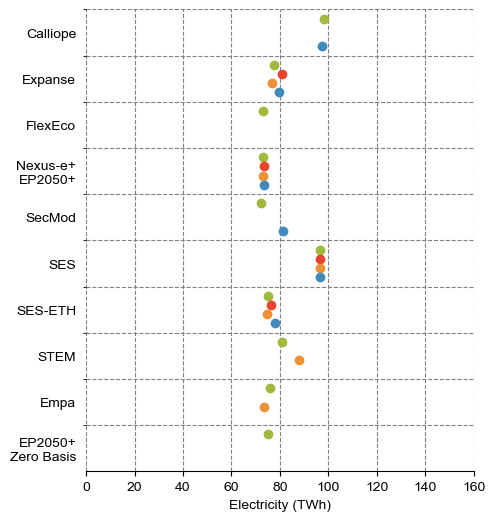

In [4]:
# Scatter plot with net supply
listModels = cross_plots.models #any model can be excluded, the list should include the model names
varName = 'Electricity-supply|Total'
sceColors = ['#9FBA3D','#E9442E','#EC9235','#3F89BD']
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 160
fileName = 'elecSupply.pdf'

cross_plots.plotScatter(listModels,varName ,sceColors,scale,xlabel,xmax,fileName)

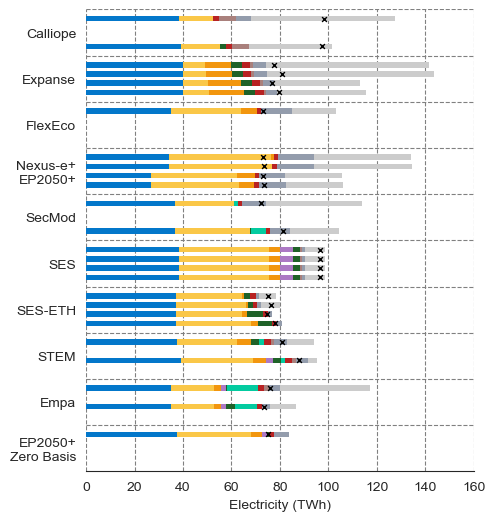

In [5]:
# Electricity supply bar plot
listModels = cross_plots.models
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 160
fileName = 'elecSupply_tech.pdf'
right = False #True if model names have to go on the right
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = 'Electricity-supply|Total'

cross_plots.plotBar(listModels,varList_supply,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)

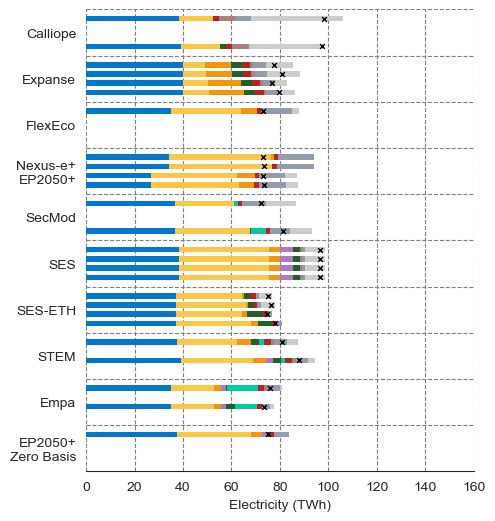

In [6]:
# Annual electricity supply with net imports 

# name: name of the technology or group of technologies
# data: list with the technologies that correspond to this category
# color: color to use for this category
varList_supply_net = [
    {'name':'Hydro','data':['Electricity-supply|Hydro Dams','Electricity-supply|Hydro RoR'],'color':'#0377CA'},
    {'name':'Solar','data':['Electricity-supply|Solar'],'color':'#FAC748'},
    {'name':'Wind','data':['Electricity-supply|Wind'],'color':'#F2960E'},
    {'name':'Geothermal','data':['Electricity-supply|Geothermal'],'color':'#ac79c4'},
    {'name':'Gas and\nbiogas','data':['Electricity-supply|Biogas','Electricity-supply|Gas'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['Electricity-supply|Hydrogen'],'color':'#03CBA0'},
    {'name':'Waste','data':['Electricity-supply|Waste'],'color':'#b82222'},
    {'name':'Wood','data':['Electricity-supply|Wood'],'color':'#a9807c'},
    {'name':'Storage','data':['Electricity-supply|PHS-out','Electricity-supply|Battery-out'],'color':'#939CAC'},
    {'name':'Net-imports','data':['Electricity-supply|Net-imports'],'color':'#CCCCCC'}
    ]

listModels = cross_plots.models
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 160
fileName = 'elecSupply_tech_net.pdf'
right = False #True if model names have to go on the right
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = 'Electricity-supply|Total'

cross_plots.plotBar(listModels,varList_supply_net,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)

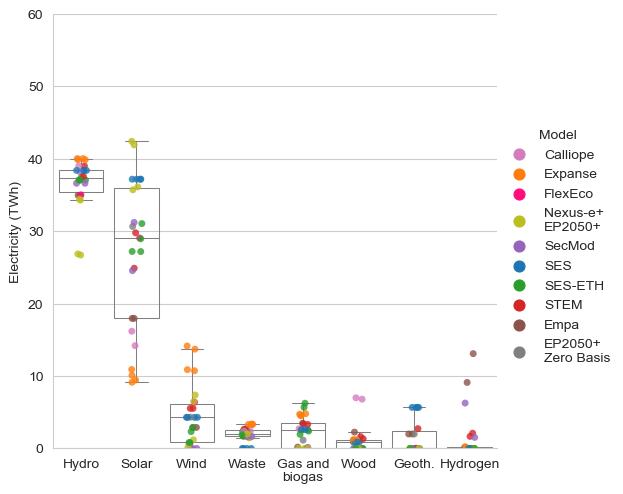

In [8]:
# Distribution of annual electricity supply by technology

# name: name of the technology or group of technologies
# data: list with the technologies that correspond to this category
varList_wopot = [
    {'name':'Hydro','data':['Electricity-supply|Hydro Dams','Electricity-supply|Hydro RoR']},
    {'name':'Solar','data':['Electricity-supply|Solar']},
    {'name':'Wind','data':['Electricity-supply|Wind']},
    {'name':'Geoth.','data':['Electricity-supply|Geothermal']},
    {'name':'Gas and\nbiogas','data':['Electricity-supply|Biogas','Electricity-supply|Gas']},
    {'name':'Hydrogen','data':['Electricity-supply|Hydrogen']},
    {'name':'Waste','data':['Electricity-supply|Waste']},
    {'name':'Wood','data':['Electricity-supply|Wood']}
    ]

listModels = cross_plots.models
order = ["Hydro",'Solar','Wind','Waste','Gas and\nbiogas','Wood','Geoth.','Hydrogen']
ylabel = 'Electricity (TWh)'
ymax = 60
fileName = 'elecDist_tech.pdf'

cross_plots.plotTechDist(listModels,varList_wopot,order,ylabel,ymax,fileName)

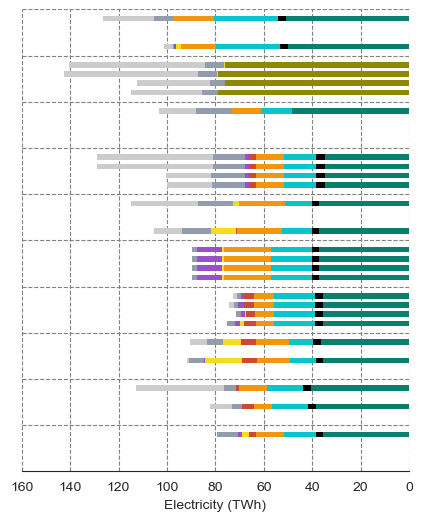

In [9]:
# Electricity consumption by use with total exports

varList_use = [
    {'name':'Total','data':['Electricity-consumption|Total demand'],'color':'#8E8900'},
    {'name':'Base','data':['Electricity-consumption|Base'],'color':'#097F6D'},
    {'name':'Trains','data':['Electricity-consumption|Trains'],'color':'#000000'},
    {'name':'Road transport','data':['Electricity-consumption|Battery-vehicles'],'color':'#09c5c9'},
    {'name':'Heat pumps','data':['Electricity-consumption|Heat pumps'],'color':'#F2960E'},
    {'name':'Heaters','data':['Electricity-consumption|Electric heaters'],'color':'#CF4832'},
    {'name':'Electrolysis','data':['Electricity-consumption|Electrolysis'],'color':'#F5DD1B'},
    {'name':'Others','data':['Electricity-consumption|New processes'],'color':'#9751CB'},
    {'name':'Storage','data':['Electricity-consumption|Battery-In','Electricity-consumption|PHS-In'],'color':'#939CAC'},
    {'name':'Exports','data':['Electricity-consumption|Exports'],'color':'#CCCCCC'}
    ]

listModels = cross_plots.models
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 160
fileName = 'elecUse.pdf'
right = True #True if model names have to go on the right
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = ''

cross_plots.plotBar(listModels,varList_use,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)



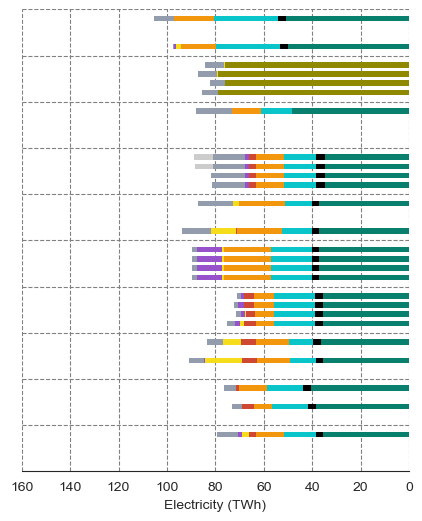

In [9]:
# Electricity consumption by use with net exports

varList_use_net = [
    {'name':'Total','data':['Electricity-consumption|Total demand'],'color':'#8E8900'},
    {'name':'Base','data':['Electricity-consumption|Base'],'color':'#097F6D'},
    {'name':'Trains','data':['Electricity-consumption|Trains'],'color':'#000000'},
    {'name':'Road transport','data':['Electricity-consumption|Battery-vehicles'],'color':'#09c5c9'},
    {'name':'Heat pumps','data':['Electricity-consumption|Heat pumps'],'color':'#F2960E'},
    {'name':'Heaters','data':['Electricity-consumption|Electric heaters'],'color':'#CF4832'},
    {'name':'Electrolysis','data':['Electricity-consumption|Electrolysis'],'color':'#F5DD1B'},
    {'name':'Others','data':['Electricity-consumption|New processes'],'color':'#9751CB'},
    {'name':'Storage','data':['Electricity-consumption|Battery-In','Electricity-consumption|PHS-In'],'color':'#939CAC'},
    {'name':'Net-exports','data':['Electricity-consumption|Net-exports'],'color':'#CCCCCC'}
    ]

listModels = cross_plots.models
scale = 1
xlabel = 'Electricity (TWh)'
xmax = 160
fileName = 'elecUse_net.pdf'
right = True #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = ''

cross_plots.plotBar(listModels,varList_use_net,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)



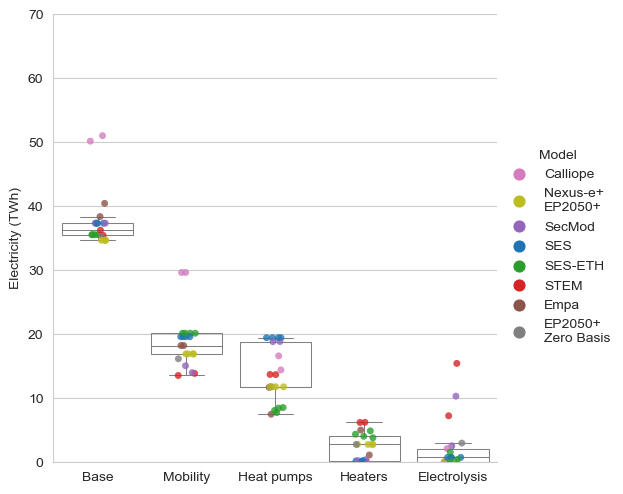

In [10]:
# Distribution of annual electricity use by use

# name: name of the technology or group of technologies
# data: list with the technologies that correspond to this category
varList_use_dist = [
    {'name':'Base','data':['Electricity-consumption|Base'],'color':'#097F6D'},
    {'name':'Mobility','data':['Electricity-consumption|Battery-vehicles','Electricity-consumption|Trains'],'color':'#09c5c9'},
    {'name':'Heat pumps','data':['Electricity-consumption|Heat pumps'],'color':'#F2960E'},
    {'name':'Heaters','data':['Electricity-consumption|Electric heaters'],'color':'#CF4832'},
    {'name':'Electrolysis','data':['Electricity-consumption|Electrolysis'],'color':'#F5DD1B'}
 ]

listModels = ['Calliope','Nexus-e+\nEP2050+','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
order = ["Base",'Mobility','Heat pumps','Heaters','Electrolysis']
ylabel = 'Electricity (TWh)'
ymax = 70
fileName = 'elecUseDist_use.pdf'

cross_plots.plotTechDist(listModels,varList_use_dist,order,ylabel,ymax,fileName)

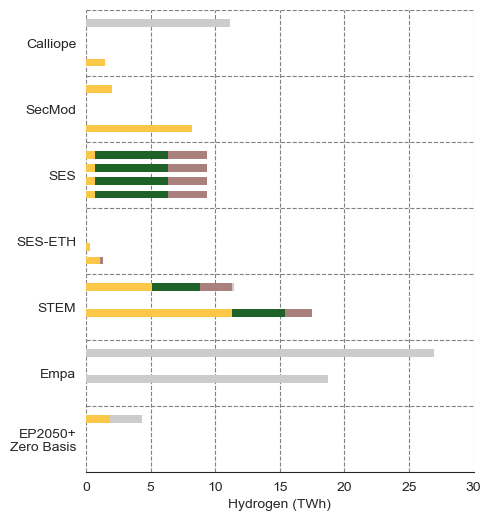

In [11]:
# Hydrogen supply by technology
varList_h2_supply = [
    {'name':'Electrolysis','data':['Hydrogen-production|Electrolysis'],'color':'#FAC748'},
    {'name':'Steam reforming','data':['Hydrogen-production|Steam-reforming'],'color':'#1f6228'},
    {'name':'Gasification','data':['Hydrogen-production|Gasification'],'color':'#a9807c'},
    {'name':'Imports','data':['Hydrogen-production|Imports'],'color':'#CCCCCC'}
    ]

listModels = ['Calliope','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
scale = 1
xlabel = 'Hydrogen (TWh)'
xmax = 30
fileName = 'h2Supply_tech.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = ''

cross_plots.plotBar(listModels,varList_h2_supply,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)


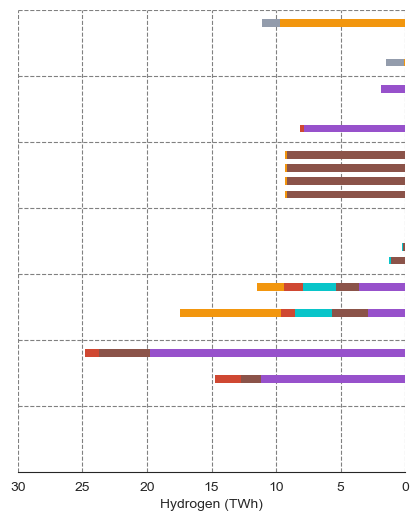

In [12]:
# Hydrogen consumption by use

varList_h2_consump = [
    {'name':'Electricity','data':['Hydrogen-consumption|CHP'],'color':'#9751CB'},
    {'name':'Freight','data':['Hydrogen-consumption|Freight'],'color':'#8B5349'},
    {'name':'Passengers','data':['Hydrogen-consumption|Passenger vehicles'],'color':'#09c5c9'},
    {'name':'Industrial heating','data':['Hydrogen-consumption|High temperature heat'],'color':'#CF4832'},
    {'name':'Fuel production','data':['Hydrogen-consumption|Fuel synthesis'],'color':'#F2960E'},
    {'name':'Industry demand','data':['Hydrogen-consumption|H2 industry demand'],'color':'#939CAC'},
    {'name':'Exports','data':['Hydrogen-consumption|Exports'],'color':'#CCCCCC'}
    ]

listModels = ['Calliope','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
scale = 1
xlabel = 'Hydrogen (TWh)'
xmax = 30
fileName = 'h2Use.pdf'
right = True #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = ''

cross_plots.plotBar(listModels,varList_h2_consump,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)


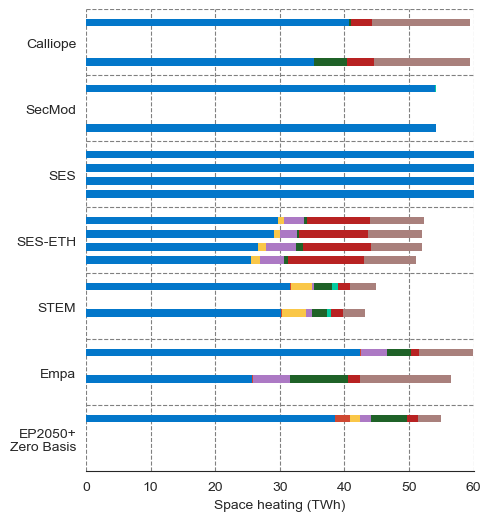

In [13]:
# Space heating supply by technology

varList_spaceHeat = [
    {'name':'Heat pumps','data':['Space heating, DHW|Heat pumps'],'color':'#0377CA'},
    {'name':'Heaters','data':['Space heating, DHW|Electric heater'],'color':'#CF4832'},
    {'name':'Solar','data':['Space heating, DHW|Solar thermal'],'color':'#FAC748'},
    {'name':'Geothermal','data':['Space heating, DHW|Geothermal'],'color':'#ac79c4'},
    {'name':'Gas','data':['Space heating, DHW|Boiler-Gas','Space heating, DHW|CHP-Gas'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['Space heating, DHW|Boiler-Hydrogen','Space heating, DHW|Boiler-Hydrogen'],'color':'#03CBA0'},
    {'name':'Waste','data':['Space heating, DHW|CHP-Waste'],'color':'#b82222'},
    {'name':'Wood','data':['Space heating, DHW|Boiler-Wood','Space heating, DHW|CHP-Wood'],'color':'#a9807c'},
    ]

listModels = ['Calliope','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
scale = 1
xlabel = 'Space heating (TWh)'
xmax = 60
fileName = 'spaceHeating.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = ''

cross_plots.plotBar(listModels,varList_spaceHeat,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)


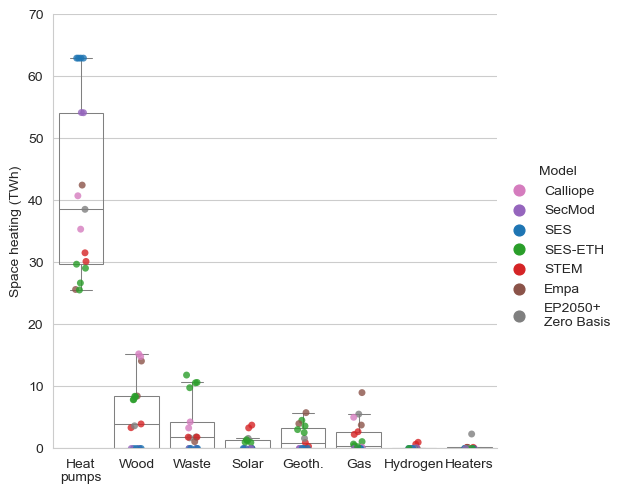

In [14]:
# Space heating distribution by technology
varList_dist_spaceheat = [
    {'name':'Heat\npumps','data':['Space heating, DHW|Heat pumps'],'color':'#0377CA'},
    {'name':'Heaters','data':['Space heating, DHW|Electric heater'],'color':'#CF4832'},
    {'name':'Solar','data':['Space heating, DHW|Solar thermal'],'color':'#FAC748'},
    {'name':'Geoth.','data':['Space heating, DHW|Geothermal'],'color':'#ac79c4'},
    {'name':'Gas','data':['Space heating, DHW|Boiler-Gas','Space heating, DHW|CHP-Gas'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['Space heating, DHW|Boiler-Hydrogen','Space heating, DHW|Boiler-Hydrogen'],'color':'#03CBA0'},
    {'name':'Waste','data':['Space heating, DHW|CHP-Waste'],'color':'#b82222'},
    {'name':'Wood','data':['Space heating, DHW|Boiler-Wood','Space heating, DHW|CHP-Wood'],'color':'#a9807c'},
    ]

listModels = ['Calliope','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
order = ["Heat\npumps",'Wood','Waste','Solar','Geoth.','Gas','Hydrogen','Heaters']
ylabel = 'Space heating (TWh)'
ymax = 70
fileName = 'spaceHeating_dist.pdf'

cross_plots.plotTechDist(listModels,varList_dist_spaceheat,order,ylabel,ymax,fileName)


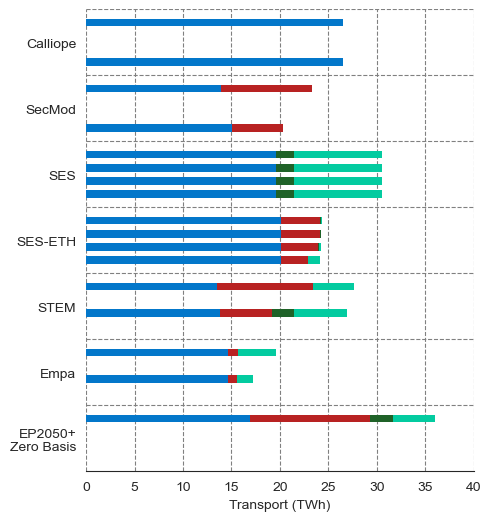

In [15]:
# Transport supply by technology

varList_transport = [
    {'name':'Electricity','data':['Transport|Electricity'],'color':'#0377CA'},
    {'name':'Synthetic fuels','data':['Transport|Oil'],'color':'#b82222'},
    {'name':'Biogas','data':['Transport|Gas'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['Transport|Hydrogen'],'color':'#03CBA0'},
    ]

listModels = ['Calliope','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
scale = 1
xlabel = 'Transport (TWh)'
xmax = 40
fileName = 'transport.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = ''

cross_plots.plotBar(listModels,varList_transport,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)


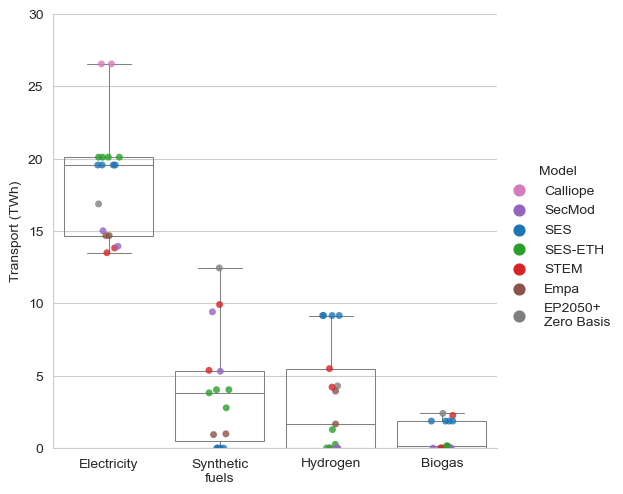

In [16]:
# Transport distribution by technology
varList_dist_transport = [
    {'name':'Electricity','data':['Transport|Electricity'],'color':'#0377CA'},
    {'name':'Synthetic\nfuels','data':['Transport|Oil'],'color':'#b82222'},
    {'name':'Biogas','data':['Transport|Gas'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['Transport|Hydrogen'],'color':'#03CBA0'},
    ]

listModels = ['Calliope','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
order = ["Electricity",'Synthetic\nfuels','Hydrogen','Biogas']
ylabel = 'Transport (TWh)'
ymax = 30
fileName = 'transport_dist.pdf'

cross_plots.plotTechDist(listModels,varList_dist_transport,order,ylabel,ymax,fileName)

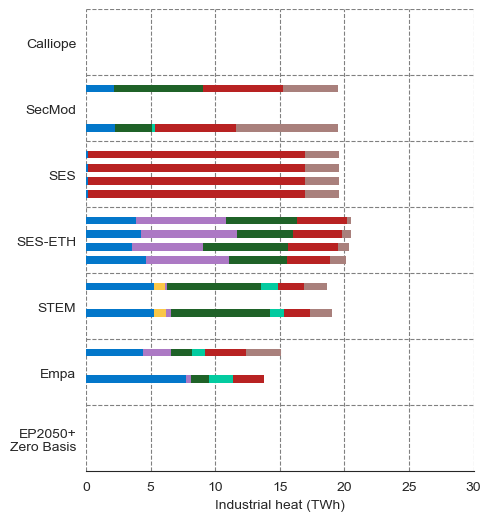

In [17]:
# Industrial heat supply by technology

varList_indHeat = [
    {'name':'Electricity','data':['Industrial heating|Heat pumps','Industrial heating|Electric heater'],'color':'#0377CA'},
    {'name':'Solar','data':['Industrial heating|Solar thermal'],'color':'#FAC748'},
    {'name':'Geothermal','data':['Industrial heating|Geothermal'],'color':'#ac79c4'},
    {'name':'Gas and\nbiogas','data':['Industrial heating|Burner-Gas','Industrial heating|CHP-Gas'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['Industrial heating|Burner-Hydrogen','Industrial heating|CHP-Hydrogen'],'color':'#03CBA0'},
    {'name':'Waste','data':['Industrial heating|Burner-Waste','Industrial heating|CHP-Waste'],'color':'#b82222'},
    {'name':'Wood','data':['Industrial heating|Burner-Wood','Industrial heating|CHP-Wood'],'color':'#a9807c'},
    ]

listModels = ['Calliope','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
scale = 1
xlabel = 'Industrial heat (TWh)'
xmax = 30
fileName = 'indHeating.pdf'
right = False #True if model names have to go on the right, it invers the axis
legend = False # True if legend has to be displayed
pos_legend = 'lower right' # Options are 'upper left', 'upper right', 'lower left', 'lower right' 
onTopVarName = ''

cross_plots.plotBar(listModels,varList_indHeat,scale,xlabel,xmax,fileName,right,legend,pos_legend,onTopVarName)


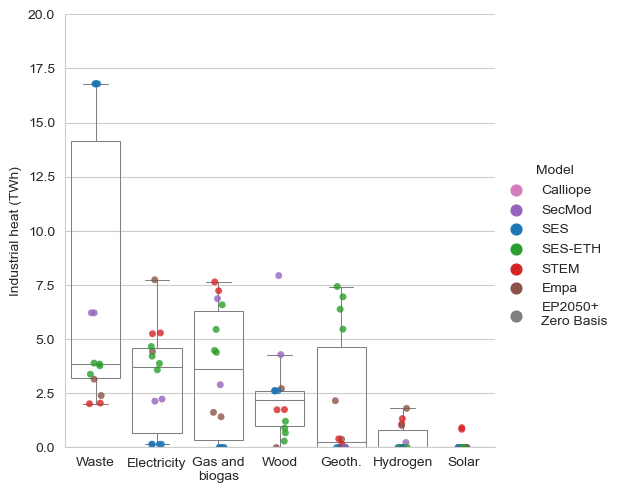

In [18]:
# Industrial heat distribution by technology
varList_indHeat_dist = [
    {'name':'Electricity','data':['Industrial heating|Heat pumps','Industrial heating|Electric heater'],'color':'#0377CA'},
    {'name':'Solar','data':['Industrial heating|Solar thermal'],'color':'#FAC748'},
    {'name':'Geoth.','data':['Industrial heating|Geothermal'],'color':'#ac79c4'},
    {'name':'Gas and\nbiogas','data':['Industrial heating|Burner-Gas','Industrial heating|CHP-Gas'],'color':'#1f6228'},
    {'name':'Hydrogen','data':['Industrial heating|Burner-Hydrogen','Industrial heating|CHP-Hydrogen'],'color':'#03CBA0'},
    {'name':'Waste','data':['Industrial heating|Burner-Waste','Industrial heating|CHP-Waste'],'color':'#b82222'},
    {'name':'Wood','data':['Industrial heating|Burner-Wood','Industrial heating|CHP-Wood'],'color':'#a9807c'},
    ]

listModels = ['Calliope','SecMod','SES','SES-ETH','STEM','Empa','EP2050+\nZero Basis']
order = ['Waste',"Electricity",'Gas and\nbiogas','Wood','Geoth.','Hydrogen','Solar']
ylabel = 'Industrial heat (TWh)'
ymax = 20
fileName = 'indHeating_dist.pdf'

cross_plots.plotTechDist(listModels,varList_indHeat_dist,order,ylabel,ymax,fileName)

In [19]:
#Get the hourly data for the variables of interest
varList_supply_h = [
    {'name':'Net-imports','data':['Electricity-supply|Imports'],'color':'#CCCCCC'},
    {'name':'Storage out','data':['Electricity-supply|PHS-out','Electricity-supply|Battery-out'],'color':'#939CAC'},
    {'name':'SPV-Battery','data':['Electricity-supply|SPV-battery'],'color':'#FEFF54'},
    {'name':'Solar','data':['Electricity-supply|Solar'],'color':'#FAC748'},
    {'name':'Hydro Dams','data':['Electricity-supply|Hydro Dams'],'color':'#ADD8E6'},
    {'name':'Wind','data':['Electricity-supply|Wind'],'color':'#F2960E'},
    {'name':'Geothermal','data':['Electricity-supply|Geothermal'],'color':'#ac79c4'},
    {'name':'Thermal','data':['Electricity-supply|Biogas','Electricity-supply|Gas','Electricity-supply|Hydrogen','Electricity-supply|Waste','Electricity-supply|Wood'],'color':'#b82222'},
    {'name':'Hydro RoR','data':['Electricity-supply|Hydro RoR'],'color':'#0377CA'},
    ]

varList_use_h = [
    {'name':'Net-exports','data':['Electricity-consumption|Exports'],'color':'#CCCCCC'},
    {'name':'Storage in','data':['Electricity-consumption|Battery-In','Electricity-consumption|PHS-In'],'color':'#939CAC'},
    {'name':'EVs','data':['Electricity-consumption|Battery-vehicles'],'color':'#09c5c9'},
    {'name':'Heat pumps','data':['Electricity-consumption|Heat pumps'],'color':'#F2960E'},
    {'name':'Heaters','data':['Electricity-consumption|Electric heaters'],'color':'#CF4832'},
    {'name':'Electrolysis','data':['Electricity-consumption|Electrolysis'],'color':'#F5DD1B'},
    {'name':'Others','data':['Electricity-consumption|New processes'],'color':'#9751CB'},
    {'name':'Trains','data':['Electricity-consumption|Trains'],'color':'#000000'},
    {'name':'Base','data':['Electricity-consumption|Base'],'color':'#097F6D'},
    {'name':'Total','data':['Electricity-consumption|Total demand'],'color':'#8E8900'}
    ]

cross_plots.extractPositiveNegative(varList_supply_h,varList_use_h)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


summer-abroad-together


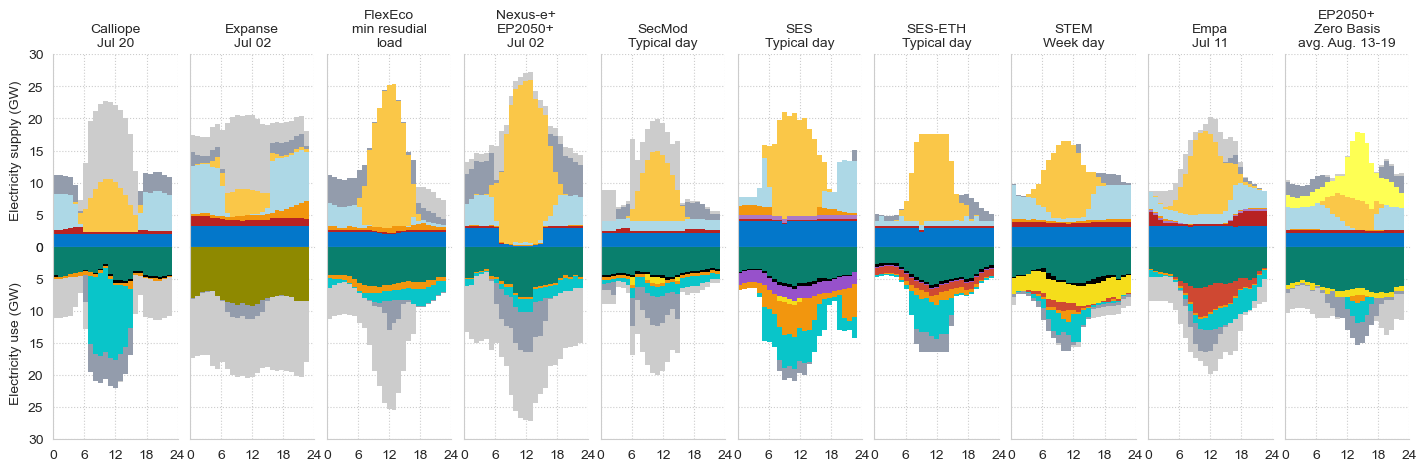

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


summer-domestic-together


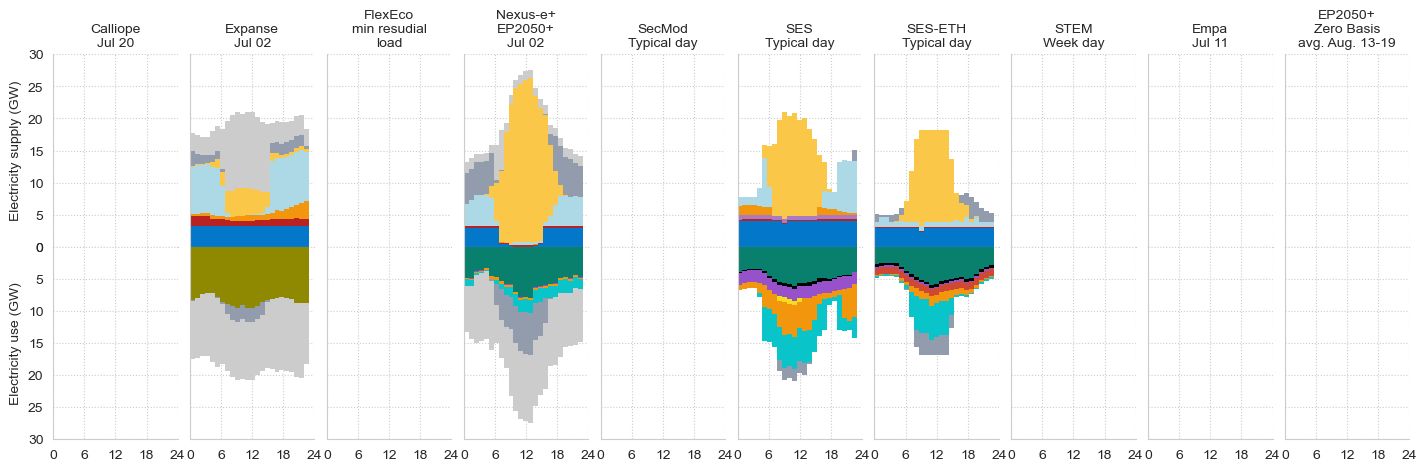

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


summer-abroad-alone


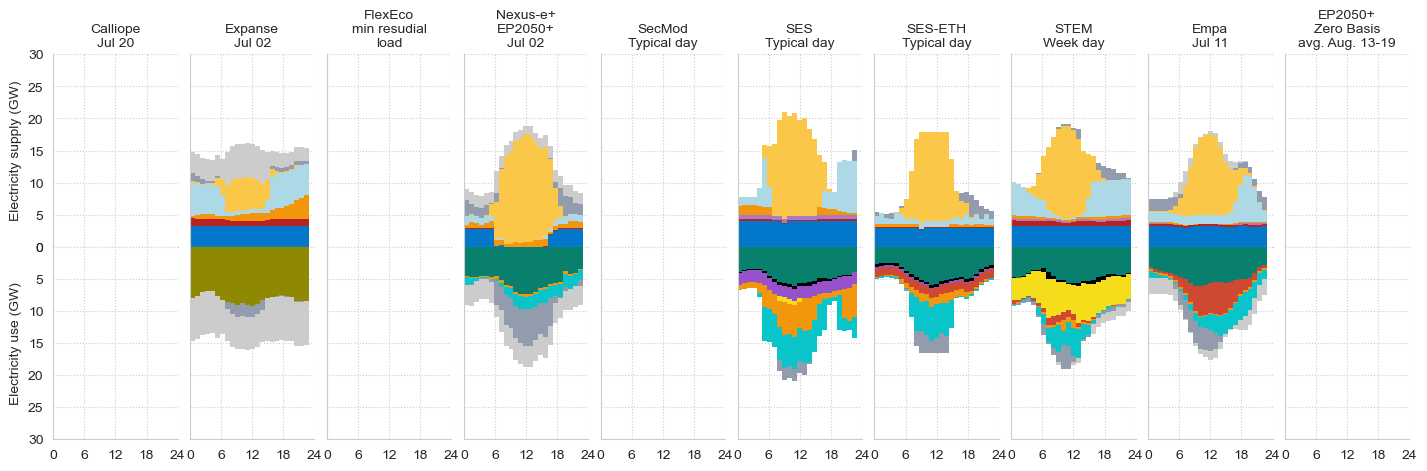

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


summer-domestic-alone


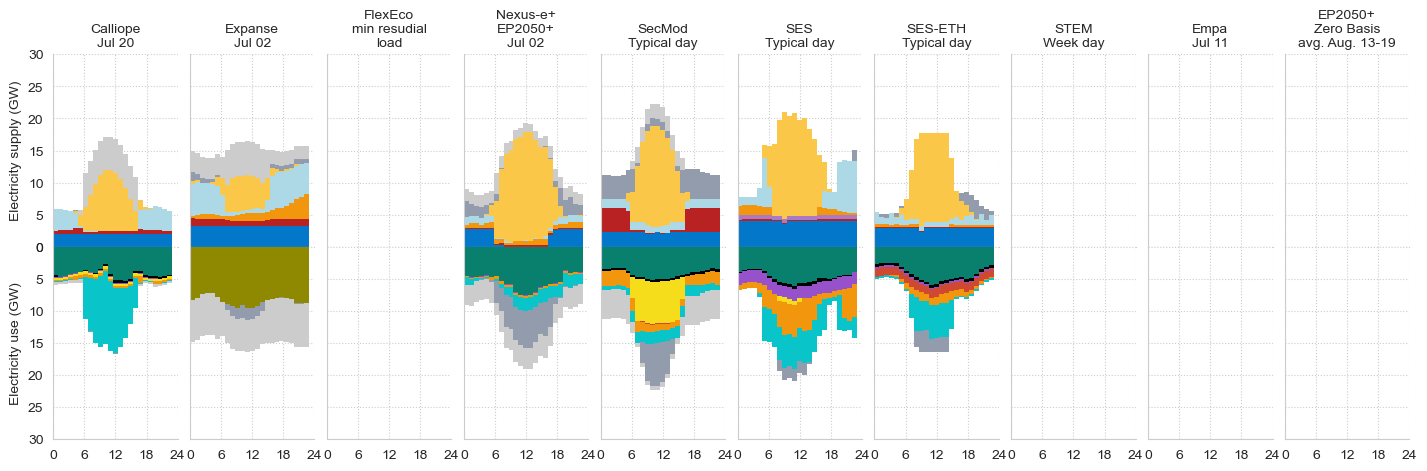

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


winter-abroad-together


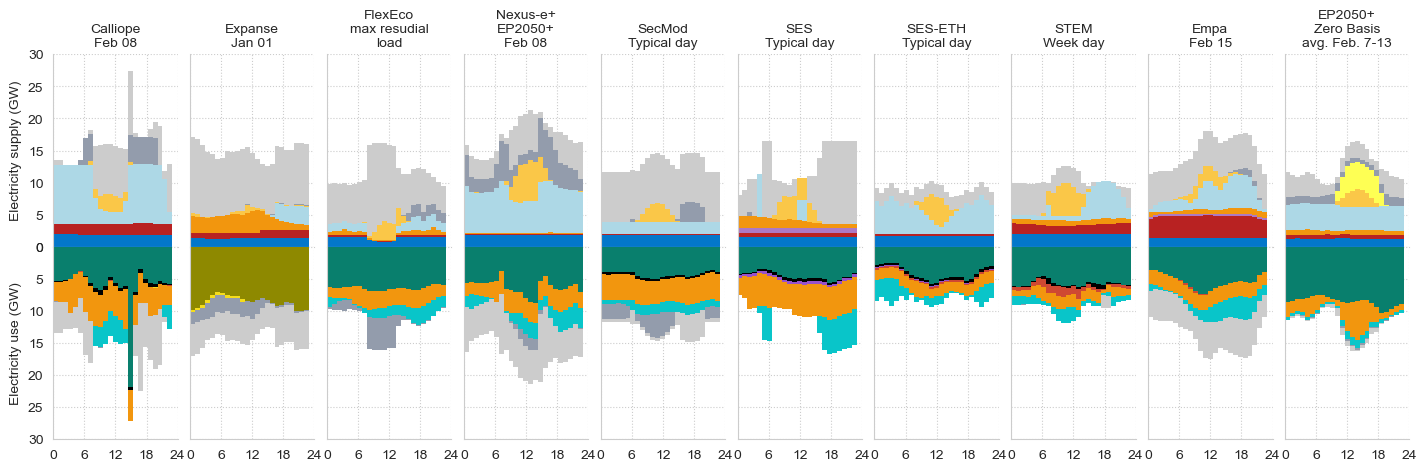

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


winter-domestic-together


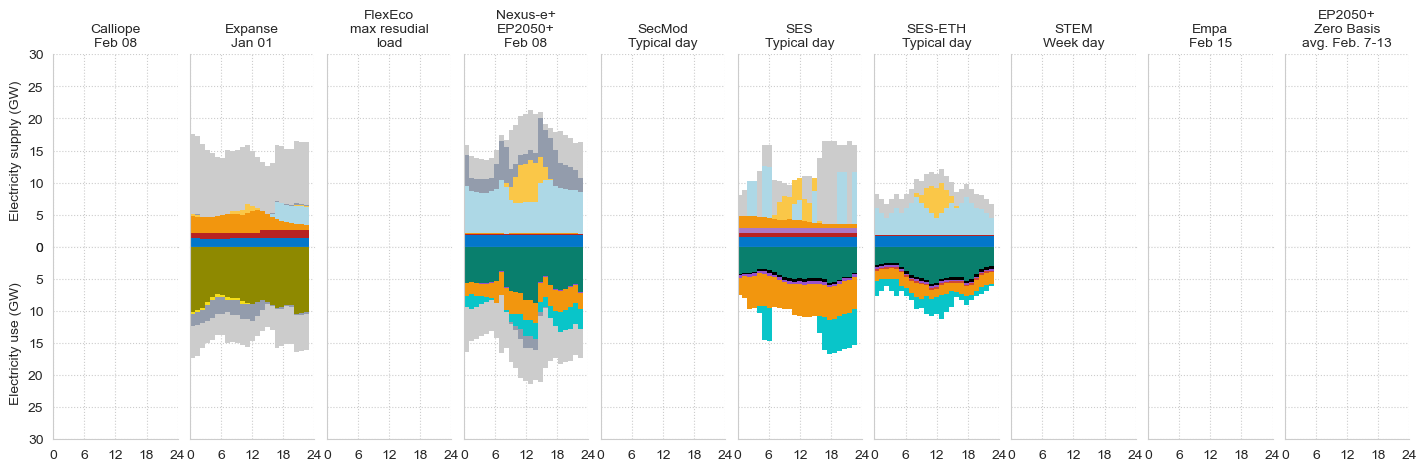

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


winter-abroad-alone


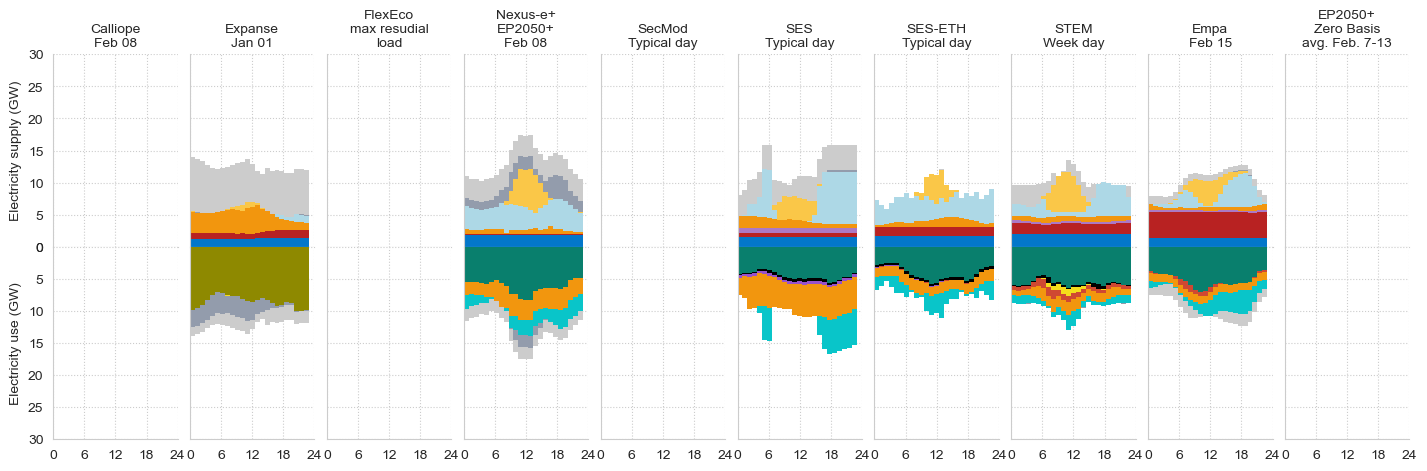

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


winter-domestic-alone


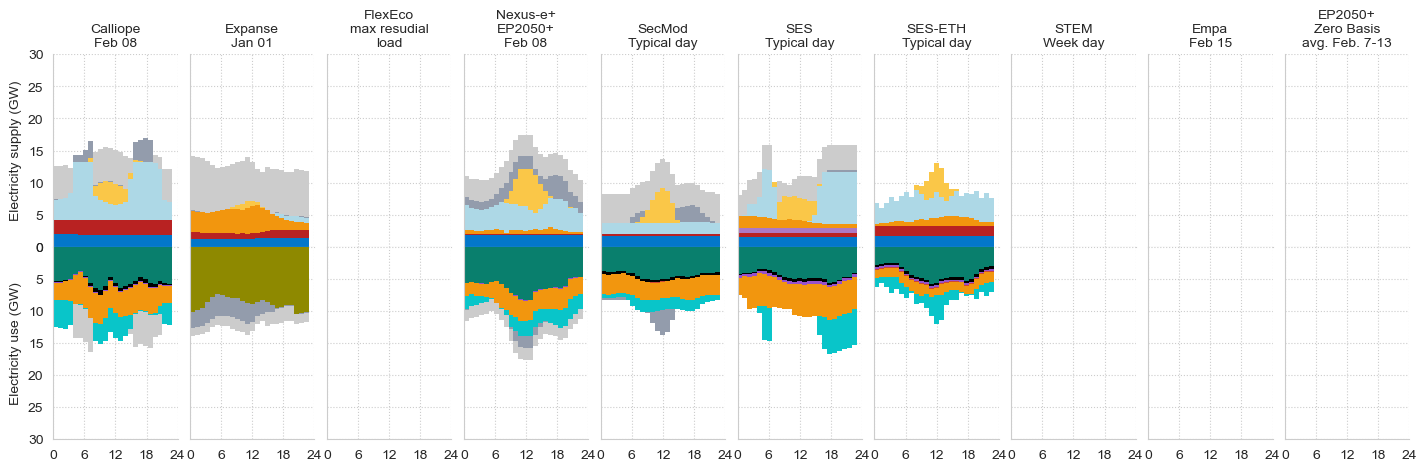

In [20]:
#Plot stacked hourly profiles
listModels = cross_plots.models
positive_variables = varList_supply_h
negative_variables = varList_use_h
ylabel_pos = "Electricity supply (GW)"
ylabel_neg = "Electricity use (GW)"
ymax = 30
legend = False
fileName = 'hourlyElec'

season = "summer"
cross_plots.plotHourlyStack(listModels,positive_variables,negative_variables,season,ylabel_pos,ylabel_neg,ymax,legend,fileName)

season = "winter"
cross_plots.plotHourlyStack(listModels,positive_variables,negative_variables,season,ylabel_pos,ylabel_neg,ymax,legend,fileName)


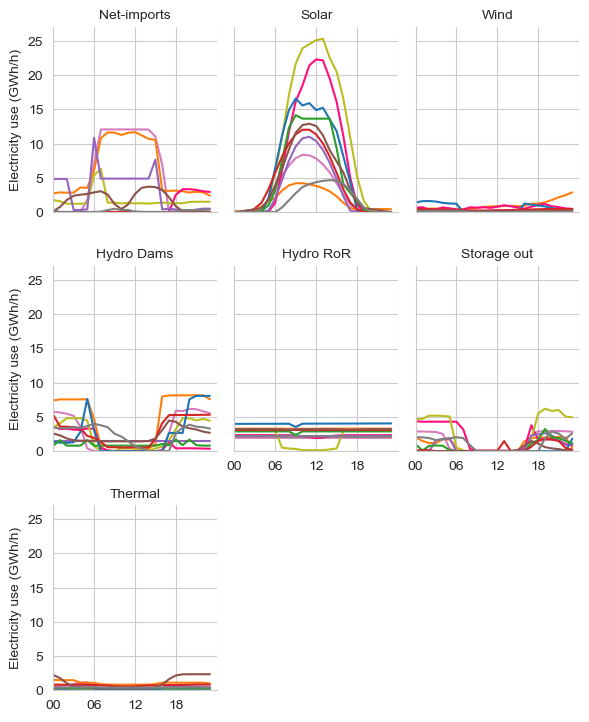

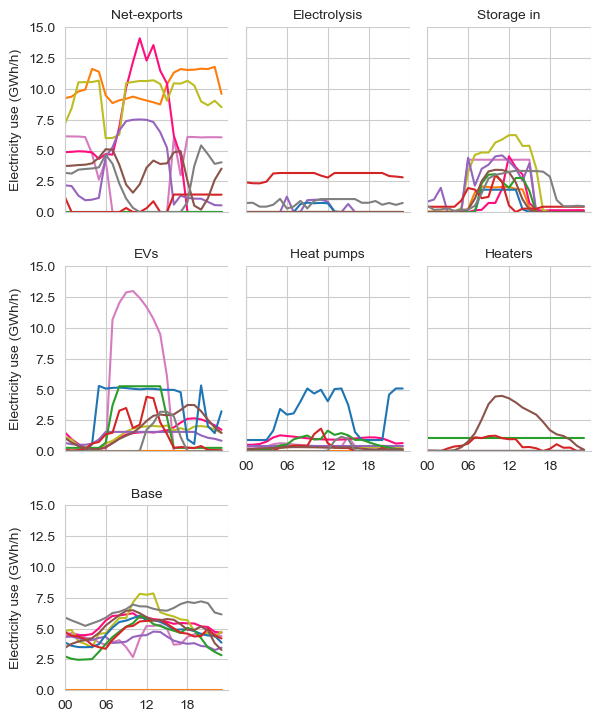

In [21]:
#Plot hourly profiles by technology
listModels = cross_plots.models

ncols = 3
scenario = "abroad-together"
season = "summer"

varList_elec_supply_dist = ['Net-imports','Solar','Wind','Hydro Dams','Hydro RoR','Storage out','Thermal']
ymax = 27
ylabel = "Electricity use (GWh/h)"
fileName = "hourProfileTech_"+season+"_"+scenario+".pdf"
cross_plots.plotHourProfileTech(listModels,scenario,varList_elec_supply_dist,season,ylabel,ymax,ncols,fileName)


varList_elec_use_dist = ['Net-exports','Electrolysis','Storage in','EVs','Heat pumps','Heaters','Base']
ymax = 15
ylabel = "Electricity use (GWh/h)"
fileName = "hourProfileSupply_"+season+"_"+scenario+".pdf"
cross_plots.plotHourProfileTech(listModels,scenario,varList_elec_use_dist,season,ylabel,ymax,ncols,fileName)
